在曼昆的_经济学原理_的第八章中, 讲解了税收与经济之间的关系. 当税率逐渐提高时, 税收的总额会先提高, 税率到达一定水平以后由于税收对经济的影响, 税收反而会下降. 这一变化过程称为拉伐曲线. 

根据_经济学原理_中引用“The New York Times,November14.1996,p.D2.”的一篇文章中说, 在1996年之后, 乌克兰打算进行税收的改革, 大幅度减税, 并通过减税来刺激经济. 

那么, 这个案例的结果是怎样的? 乌克兰是否按照计划进行了减税, 减税之后该国的经济是否发生了改善? 在<经济学原理>这本书中并没有讲解. 

本文通过世界银行中乌克兰以及周边前独联体国家的公开数据进行了初步的分析. <!-- TEASER_END -->

# 拉伐曲线

在供求曲线上, 税收使价格偏离于市场均衡价格. 税收的收入和税收造成的无谓损失可以在供求曲线上用面积表示

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.animation as animation

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

% matplotlib inline

In [26]:
amount=np.linspace(0,1,100)
k_supply=1
k_demand=1
b_price=1
supply=amount*k_supply
demand=amount*(-1 *  k_demand)+b_price

price_eq=b_price/(k_supply+k_demand)*k_supply

def get_amount(tax):
    amount_eq=b_price/(k_supply+k_demand)
    amount_at_tax=amount_eq-(tax/(k_supply+k_demand))
    return amount_eq, amount_at_tax
def get_price(tax):
    amount_eq, amount_at_tax= get_amount(tax)
    price_supply=k_supply * amount_at_tax
    price_demand=b_price-k_demand * amount_at_tax
    return price_supply, price_demand
def compute_tax(tax):
    t=np.linspace(0,tax,100)
    amount_eq, amount_at_tax= get_amount(t)
    s=t*amount_at_tax
    return t,s
def compute_waste(tax):
    t=np.linspace(0,tax,100)
    amount_eq, amount_at_tax= get_amount(t)
    s=t*(amount_eq-amount_at_tax)/2
    return t,s

def draw_supply_demand_curve(tax):
    amount_eq, amount_at_tax= get_amount(tax)
    
    ax_supply_demand.plot(amount,supply)
    ax_supply_demand.plot(amount,demand)
    ax_supply_demand.axvline(amount_at_tax)
    
    price_supply, price_demand=get_price(tax)

    l_supply=ax_supply_demand.plot([0,amount_at_tax],[price_supply,price_supply])
    l_demand=ax_supply_demand.plot([0,amount_at_tax],[price_demand,price_demand])
    ax_supply_demand.fill_between(np.linspace(0,amount_at_tax,100),
                                  np.linspace(price_demand,price_demand,100),
                                  np.linspace(price_supply,price_supply,100),color='yellow') 
    ax_supply_demand.set(title="Supply-Demand")
def draw_tax(tax):
    t,s=compute_tax(tax)
    ax_tax.plot(t,s)
    ax_tax.set(title="Tax")


def draw_waste(tax):
    t,s=compute_waste(tax)
    ax_waste.plot(t,s)
    ax_waste.set(title="Waste")

def draw_tax_level(tax):
    draw_supply_demand_curve(tax)
    draw_tax(tax)
    draw_waste(tax)
    plt.show()


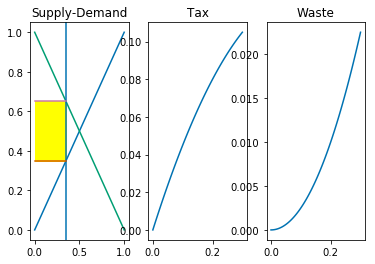

In [27]:
tax=0.3
fig,(ax_supply_demand, ax_tax, ax_waste) =plt.subplots(1,3)
draw_tax_level(tax)

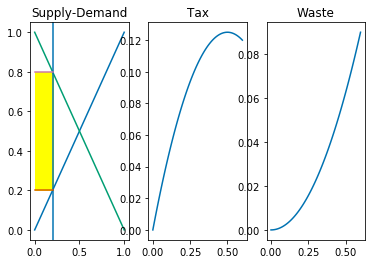

In [28]:
tax=0.6
fig,(ax_supply_demand, ax_tax, ax_waste) =plt.subplots(1,3)
draw_tax_level(tax)

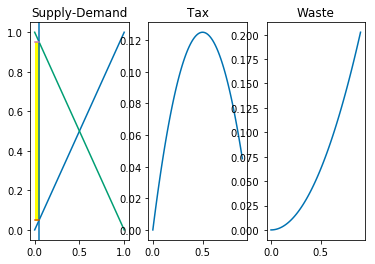

In [29]:
tax=0.9
fig,(ax_supply_demand, ax_tax, ax_waste) =plt.subplots(1,3)
draw_tax_level(tax)

# 获取数据

[The Republics of the Soviet Union or the Union Republics](https://en.wikipedia.org/wiki/Republics_of_the_Soviet_Union) included: 

|||||
|:|:|:|:|
|Armenia|Azerbaijan|Byelorussia|Estonia|Georgia|
|Kazakhstan|Kirghizia|Latvia|Lithuania|Moldavia|
|Russian SFSR|Tajikistan|Turkmenia|Ukraine|Uzbekistan| 

get data from data.worldbank.org 
* GDP: API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
* tax: API_GC.TAX.TOTL.CN_DS2_en_csv_v2.csv http://api.worldbank.org/v2/en/indicator/GC.TAX.TOTL.CN?downloadformat=csv

Beware, some countries have changed name:
* Kirghizia -> Kyrgyz Republic
* Russian SFSR ->Russian Federation
* Moldavia -> Moldova
* Turkmenia -> Turkmenistan


In [30]:
# read data
former_CCCP=["Armenia","Azerbaijan","Belarus","Estonia","Georgia",
             "Kazakhstan","Kyrgyz Republic","Latvia","Lithuania","Moldova",
             "Russian Federation","Tajikistan","Turkmenistan","Ukraine","Uzbekistan"]
interested_year=["1996","1997","1998","1999",
                 "2000","2001","2002","2003","2004",
                 "2005","2006"]
                
df_GDP=(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv"
                    ,header=2)
        .set_index("Country Name")
        .loc[former_CCCP, interested_year])
df_tax=(pd.read_csv("API_GC.TAX.TOTL.CN_DS2_en_csv_v2.csv"
                    ,header=2)
        .set_index("Country Name")
        .loc[former_CCCP, interested_year])
df_GDP

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
Country Name,,,,,,,,,,,
Armenia,1.596969e+09,1.639492e+09,1.893726e+09,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,4.900470e+09,6.384452e+09
Azerbaijan,3.176750e+09,3.962710e+09,4.446396e+09,4.581222e+09,5.272617e+09,5.707720e+09,6.235795e+09,7.276013e+09,8.680472e+09,1.324572e+10,2.098302e+10
Belarus,1.475686e+10,1.412841e+10,1.522201e+10,1.213849e+10,1.273686e+10,1.235482e+10,1.459493e+10,1.782544e+10,2.314159e+10,3.021009e+10,3.696182e+10
Estonia,4.746110e+09,5.066240e+09,5.617109e+09,5.726898e+09,5.685775e+09,6.245070e+09,7.322070e+09,9.833871e+09,1.205920e+10,1.400609e+10,1.696363e+10
Georgia,3.094916e+09,3.510541e+09,3.613500e+09,2.800024e+09,3.057453e+09,3.219488e+09,3.395779e+09,3.991375e+09,5.125274e+09,6.410941e+09,7.745406e+09
Kazakhstan,2.103536e+10,2.216593e+10,2.213525e+10,1.687082e+10,1.829199e+10,2.215269e+10,2.463659e+10,3.083370e+10,4.315165e+10,5.712367e+10,8.100388e+10
Kyrgyz Republic,1.827571e+09,1.767864e+09,1.645964e+09,1.249062e+09,1.369693e+09,1.525112e+09,1.605641e+09,1.919013e+09,2.211535e+09,2.460248e+09,2.834169e+09
Latvia,5.970045e+09,6.525676e+09,7.174985e+09,7.533188e+09,7.937759e+09,8.350253e+09,9.546442e+09,1.174843e+10,1.437327e+10,1.692250e+10,2.144702e+10
Lithuania,8.385109e+09,1.012027e+10,1.124036e+10,1.097288e+10,1.153921e+10,1.225250e+10,1.427836e+10,1.880258e+10,2.264993e+10,2.612558e+10,3.021606e+10


In [31]:
df_tax

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
Country Name,,,,,,,,,,,
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.670438e+11,3.215319e+11,3.823847e+11
Azerbaijan,2.691736e+08,3.377426e+08,4.362452e+08,4.807008e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belarus,3.606530e+02,7.606070e+02,1.201561e+03,5.045198e+03,1.518470e+04,2.705580e+04,3.711910e+04,6.467626e+04,9.184167e+04,1.311080e+05,1.761558e+05
Estonia,5.138752e+07,6.420309e+07,7.206486e+07,7.230772e+07,7.765010e+07,8.583270e+07,9.816254e+07,1.108196e+08,1.264326e+08,1.384710e+08,1.730894e+08
Georgia,NaN,3.796000e+08,3.637000e+08,4.480000e+08,4.624000e+08,4.907000e+08,5.679000e+08,6.023000e+08,9.753000e+08,1.407300e+09,2.130300e+09
Kazakhstan,NaN,1.134920e+11,1.264380e+11,1.561820e+11,2.657462e+11,3.134320e+11,4.582271e+11,6.033957e+11,8.164581e+11,NaN,NaN
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latvia,8.735295e+08,1.200648e+09,1.423299e+09,1.421904e+09,1.422815e+09,1.543546e+09,1.678135e+09,1.933882e+09,2.255949e+09,2.928967e+09,3.804916e+09
Lithuania,5.318234e+08,7.348963e+08,8.366920e+08,8.177450e+08,7.849861e+08,7.967447e+08,8.443292e+08,9.192916e+08,1.021690e+09,1.200333e+09,1.426995e+09


很遗憾, 税收的数据中有很多空缺, 甚至我最感兴趣的Ukraine的税收数据在1998年之前都是空缺的. 

# GDP变化率

由于缺乏税收的数据, 我很难去评估税收与GDP之间的相互关系了. 也难以确定乌克兰是否在1996年前后进行了减税. 所以只好假定乌克兰当时进行了减税, 看看乌克兰的GDP变化与其他国家是否有差别. 因此, 我以各国1996年的数据作为基准, 看GDP的对数变化率. 


In [32]:
df_GDP_change=(pd.DataFrame(
    np.log(np.asarray(df_GDP))/np.log(np.expand_dims( np.asarray(df_GDP["1996"]), axis=1)),
    index=df_GDP.index,columns=df_GDP.columns))

粗略看一下各国的GDP变化率, 但很难看出什么端倪. 

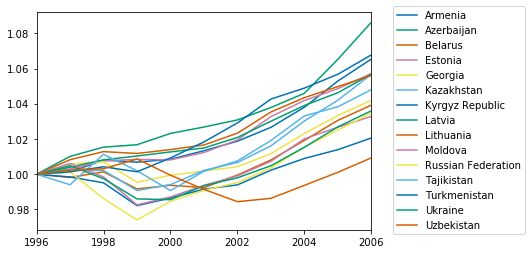

In [33]:
c=df_GDP_change.T.plot()
c.legend(bbox_to_anchor=(1.05, 1.05));

于是看一下除去乌克兰以外, 每年GDP变化率的分布, 再看看乌克兰在这些分布中的位置

In [34]:
import warnings
warnings.filterwarnings('ignore')

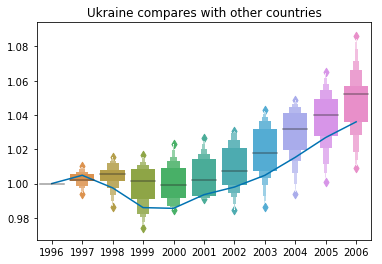

In [35]:
line_plot=sns.tsplot(df_GDP_change.loc["Ukraine"])
box_plot=sns.lvplot(data=df_GDP_change.drop("Ukraine",axis=0))
ax=plt.gca()
ax.set(title="Ukraine compares with other countries");
# ax.plot(df_GDP_change.loc["Ukraine"],color="b",label="Ukraine",zorder=1.2)
# ax.legend()

看起来, 即使在1996年发生过减税, 乌克兰的GDP增长仍然处于各个前苏联共和国之中的较差水平. 

很遗憾, 减税政策并没有产生非常明显的促进经济作用.  